In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('/kaggle/input/bangladeshi-universities-dataset/university_of_bangladesh.csv')

Ph.D. granting > doc or not
Acronym > short refer

In [3]:
df.sample(2)

,University,Acronym,Established,Location,Division,Specialization,Type,Ph.D. granting
101,Asa University Bangladesh,ASAUB,2006,Dhaka,Dhaka Division,General,Private,No
107,Khwaja Yunus Ali University,KYAU,2010,Sirajgonj,Rajshahi Division,General,Private,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   University      161 non-null    object
 1   Acronym         161 non-null    object
 2   Established     161 non-null    int64 
 3   Location        161 non-null    object
 4   Division        161 non-null    object
 5   Specialization  161 non-null    object
 6   Type            161 non-null    object
 7   Ph.D. granting  160 non-null    object
dtypes: int64(1), object(7)
memory usage: 10.2+ KB


In [5]:
df = df.dropna()

In [6]:
df.isnull().sum()

University        0
Acronym           0
Established       0
Location          0
Division          0
Specialization    0
Type              0
Ph.D. granting    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe(include='O')

,University,Acronym,Location,Division,Specialization,Type,Ph.D. granting
count,160,160,160,160,160,160,160
unique,159,144,45,19,20,2,2
top,Asian University for Women,BU,Dhaka,Dhaka Division,General,Private,No
freq,2,4,65,64,99,104,113


In [9]:
df.columns

Index(['University', 'Acronym', 'Established', 'Location', 'Division',
       'Specialization', 'Type', 'Ph.D. granting'],
      dtype='object')

# **Preprocessing**

In [10]:
df['Location'].value_counts()[:5]

Dhaka         65
Chittagong    15
Sylhet         9
Khulna         6
Gazipur        6
Name: Location, dtype: int64

In [11]:
df['Type'].value_counts()

Private    104
Public      56
Name: Type, dtype: int64

In [12]:
df['Ph.D. granting'].value_counts()

No     113
Yes     47
Name: Ph.D. granting, dtype: int64

In [13]:
df['Specialization'].value_counts()[:5]

General                                              99
Science , Technology,Engineering and Mathematics     26
Engineering                                           9
Agricultural Science                                  6
Medical                                               5
Name: Specialization, dtype: int64

In [14]:
df.sample(2)

,University,Acronym,Established,Location,Division,Specialization,Type,Ph.D. granting
85,Northern University of Bangladesh,NUB,2002,Dhaka,Dhaka Division,General,Private,No
22,Mawlana Bhashani Science and Technology Univer...,MBSTU,1999,Tangail,Dhaka division,"Science , Technology,Engineering and Mathematics",Public,Yes


# **EDA**
* **Uni-variate**
* **Bi-variate**
* **Multi-variate**

# **Uni-vairate analysis**

In [15]:
df['Division'].describe(include='O')

count                160
unique                19
top       Dhaka Division
freq                  64
Name: Division, dtype: object

<AxesSubplot:>

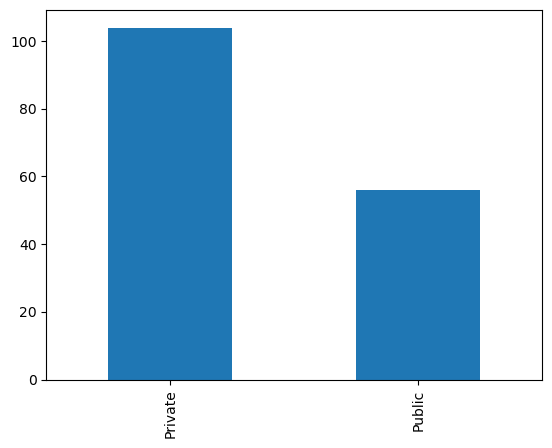

In [16]:
df['Type'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Ph.D. granting'>

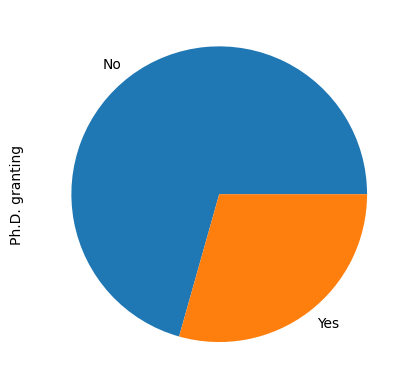

In [17]:
df['Ph.D. granting'].value_counts().plot(kind='pie')

# **Bi-variate analysis**

In [18]:
df.head(2)

,University,Acronym,Established,Location,Division,Specialization,Type,Ph.D. granting
0,University of Rajshahi,RU,1953,Rajshahi,Rajshahi division,General,Public,Yes
1,University of Dhaka,DU,1921,Dhaka,Dhaka division,General,Public,Yes


**Most division have Ph.D**

<AxesSubplot:>

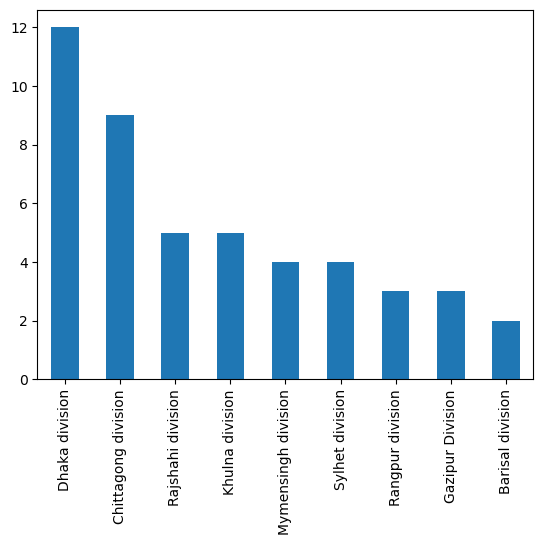

In [19]:
df[df['Ph.D. granting'] == 'Yes']['Division'].value_counts().plot(kind='bar')

**Most Division don't have Ph.D**

<AxesSubplot:>

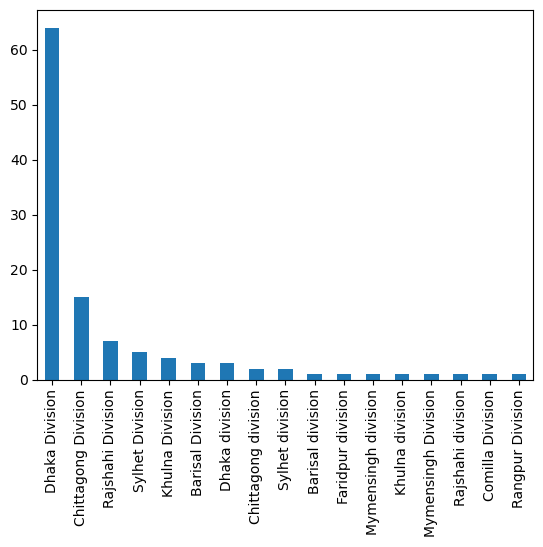

In [20]:
df[df['Ph.D. granting'] == 'No']['Division'].value_counts().plot(kind='bar')

**Most division Public**

<AxesSubplot:>

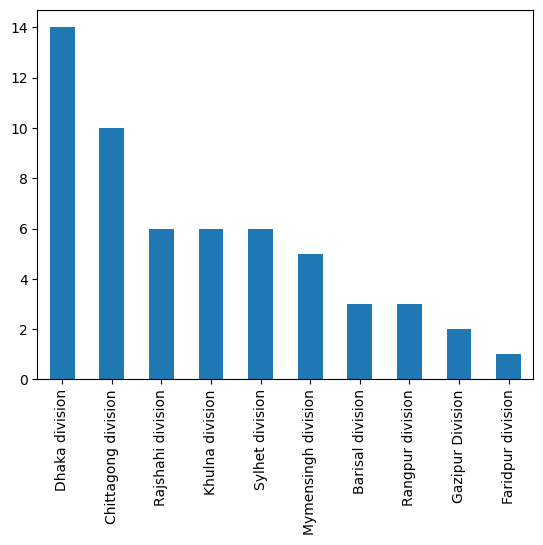

In [21]:
df[df['Type'] == 'Public']['Division'].value_counts().plot(kind='bar')

**Most division Private**

<AxesSubplot:>

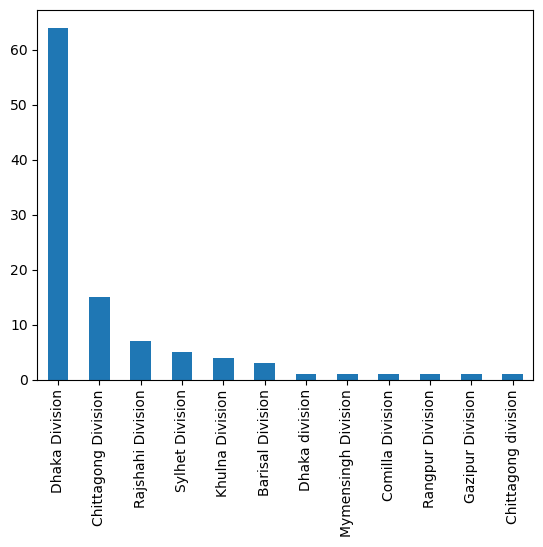

In [22]:
df[df['Type'] == 'Private']['Division'].value_counts().plot(kind='bar')

# **Multi-variate analysis**

**Which public or private in each specialization?**

In [23]:
fig = px.bar(data_frame=df,
            x = df['Specialization'],
            color = df['Type'])
fig.update_xaxes(title='Specialization')
fig.update_yaxes(title='Public or private')
fig.show()

**Which have Ph.D in each specialization?**

<AxesSubplot:xlabel='Specialization', ylabel='count'>

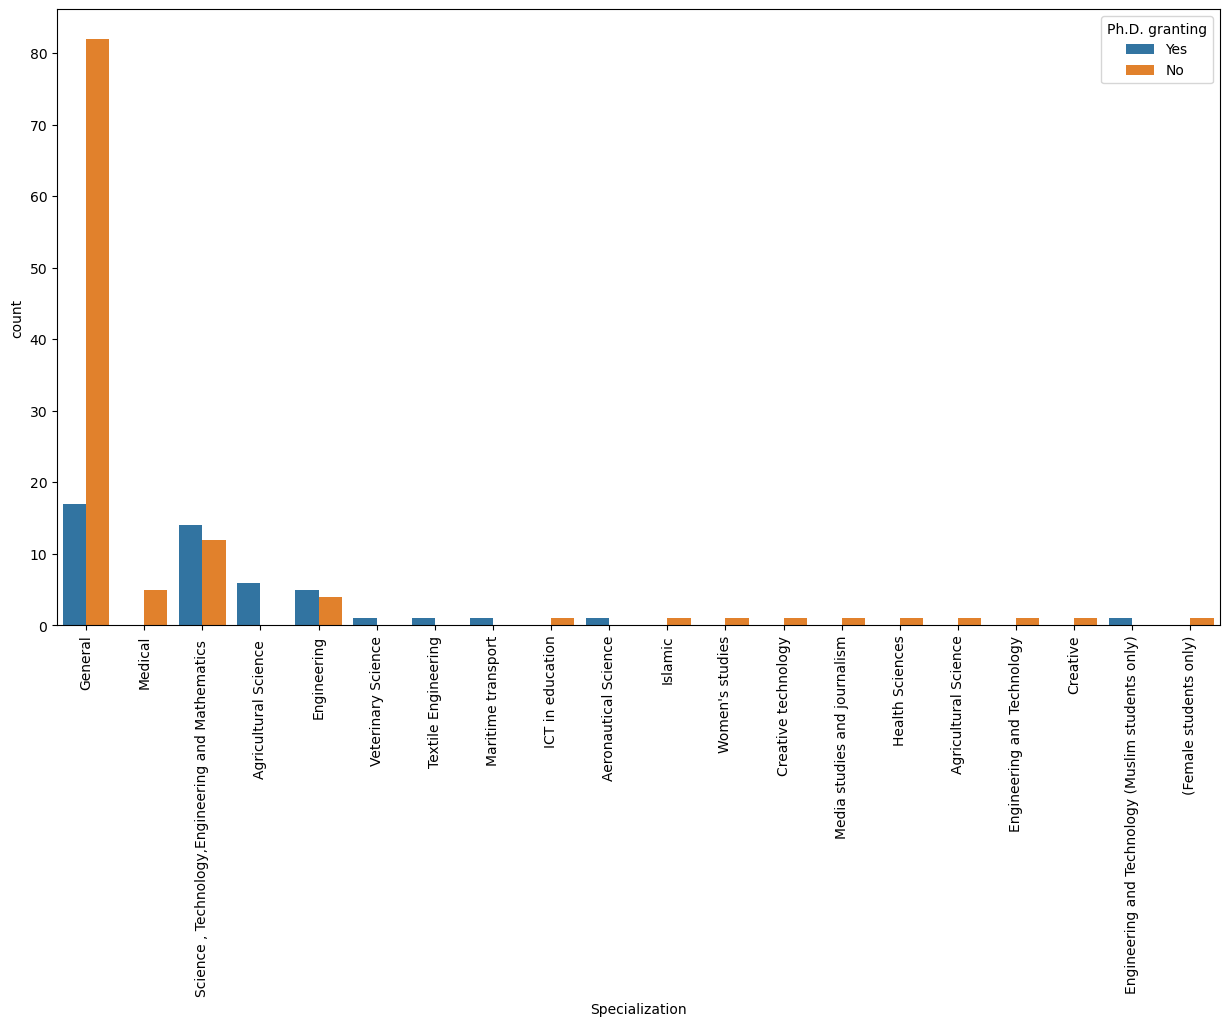

In [24]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.countplot(data=df, x = df['Specialization'], hue = df['Ph.D. granting'])

**Which division have Ph.D or not or both?**

<AxesSubplot:xlabel='Division', ylabel='count'>

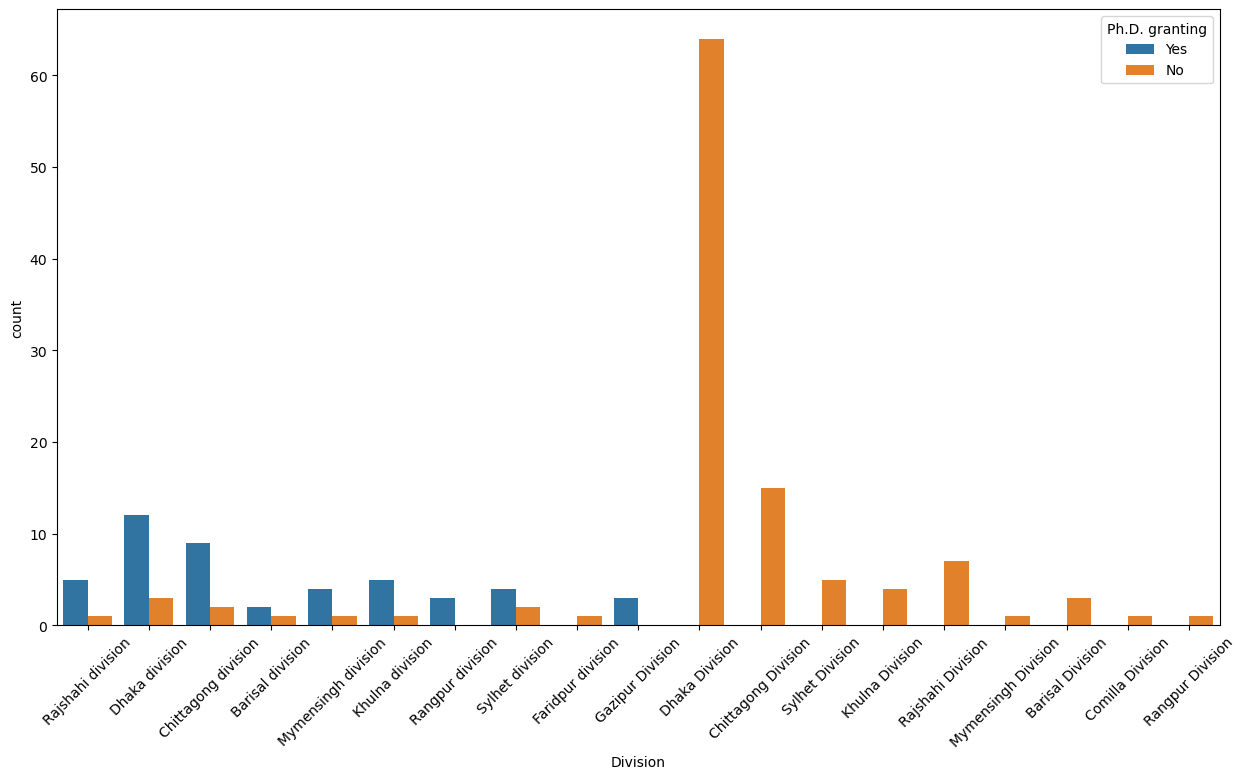

In [25]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.countplot(data=df, x = df['Division'], hue=df['Ph.D. granting'])

**Which division private or public or both?**

<AxesSubplot:xlabel='Division', ylabel='count'>

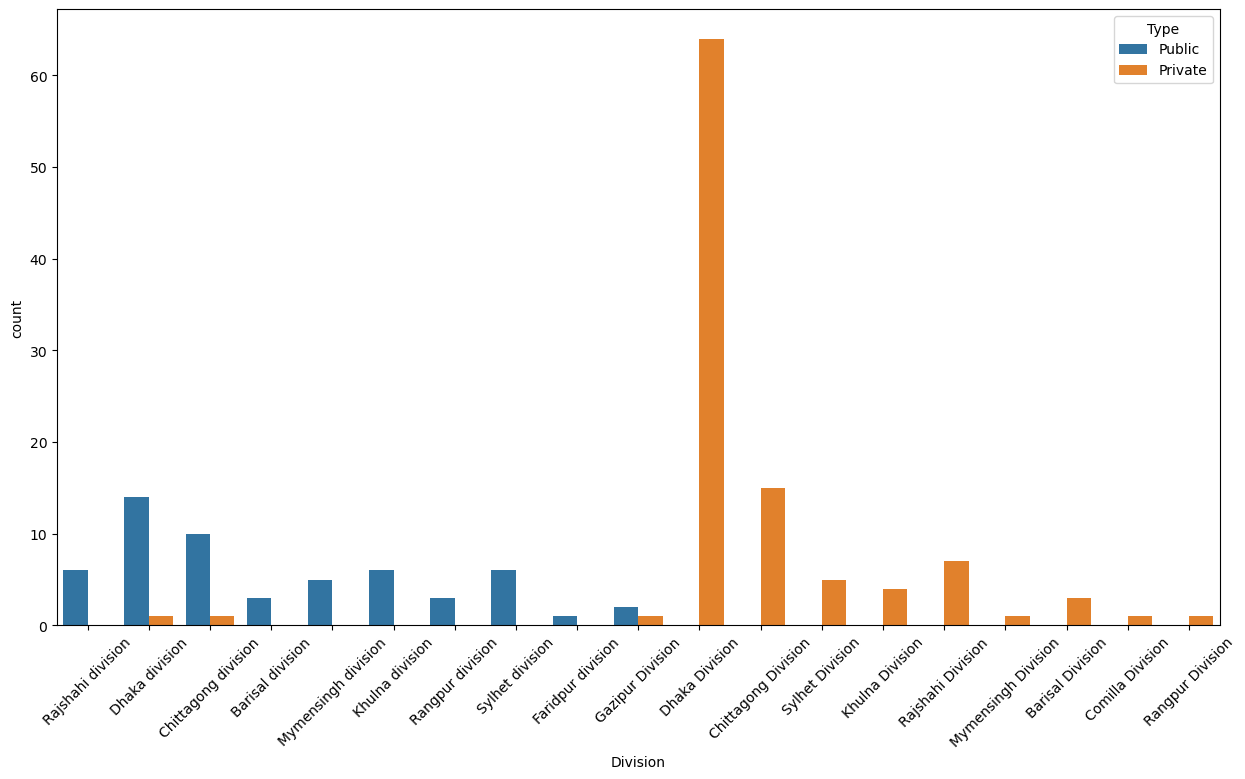

In [26]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.countplot(data=df, x = df['Division'], hue=df['Type'])

# **Give me Upvote!**

![Give me Upvoted! ](https://thumbs.dreamstime.com/b/like-gesture-perfect-choice-man-smiling-thumbs-up-satisfied-showing-isolated-orange-background-188057561.jpg)